<a href="https://colab.research.google.com/github/snehasri25/Data-Visualization/blob/master/Nightingale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
require("tidyverse")
require("dplyr")
require("reshape2")
library("HistData")
require("ggplot2")

In [78]:
#loading dataset and displaying it
#install.packages("HistData")
data(Nightingale)
#head(Nightingale)
data <- Nightingale
head(data)

,Date,Month,Year,Army,Disease,Wounds,Other,Disease.rate,Wounds.rate,Other.rate
,<date>,<ord>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1854-04-01,Apr,1854,8571,1,0,5,1.4,0.0,7.0
2,1854-05-01,May,1854,23333,12,0,9,6.2,0.0,4.6
3,1854-06-01,Jun,1854,28333,11,0,6,4.7,0.0,2.5
4,1854-07-01,Jul,1854,28722,359,0,23,150.0,0.0,9.6
5,1854-08-01,Aug,1854,30246,828,1,30,328.5,0.4,11.9
6,1854-09-01,Sep,1854,30290,788,81,70,312.2,32.1,27.7


In [79]:
#keeping the essential columns only
data1<- data[,c(1,8:10)]
names(data1)[2] <- "Diseases"
names(data1)[3] <- "Wounds"
names(data1)[4] <- "Other"
head(data1)

,Date,Diseases,Wounds,Other
,<date>,<dbl>,<dbl>,<dbl>
1,1854-04-01,1.4,0.0,7.0
2,1854-05-01,6.2,0.0,4.6
3,1854-06-01,4.7,0.0,2.5
4,1854-07-01,150.0,0.0,9.6
5,1854-08-01,328.5,0.4,11.9
6,1854-09-01,312.2,32.1,27.7


In [80]:
# reshaping (aggregating) data according to different causes of death
data1_reshape <- melt(data1, "Date")
names(data1_reshape) <- c("Date", "Causes", "Death_Rate")
head(data1_reshape)

,Date,Causes,Death_Rate
,<date>,<fct>,<dbl>
1,1854-04-01,Diseases,1.4
2,1854-05-01,Diseases,6.2
3,1854-06-01,Diseases,4.7
4,1854-07-01,Diseases,150.0
5,1854-08-01,Diseases,328.5
6,1854-09-01,Diseases,312.2


In [81]:
# Death rates due to diseases were higher before 1855 than after. Splitting data into 2 categories based on these dates/years
data1_reshape$Reign <- ordered( rep(c(rep('Before', 12), rep('After', 12)), 3), 
                          levels=c('Before', 'After'))
data2 <- data1_reshape
head(data2)

,Date,Causes,Death_Rate,Reign
,<date>,<fct>,<dbl>,<ord>
1,1854-04-01,Diseases,1.4,Before
2,1854-05-01,Diseases,6.2,Before
3,1854-06-01,Diseases,4.7,Before
4,1854-07-01,Diseases,150.0,Before
5,1854-08-01,Diseases,328.5,Before
6,1854-09-01,Diseases,312.2,Before


In [0]:
# separating subsets according to the column created above
df1 <- subset(data2, Reign=='Before')
df2 <- subset(data2, Reign=='After')

# sorting in decreasing order of deaths
df1 <- df1[order(df1$Death_Rate, decreasing=TRUE),]
df2 <- df2[order(df2$Death_Rate, decreasing=TRUE),]

# merging the two sorted sets
df <- rbind(df1, df2)


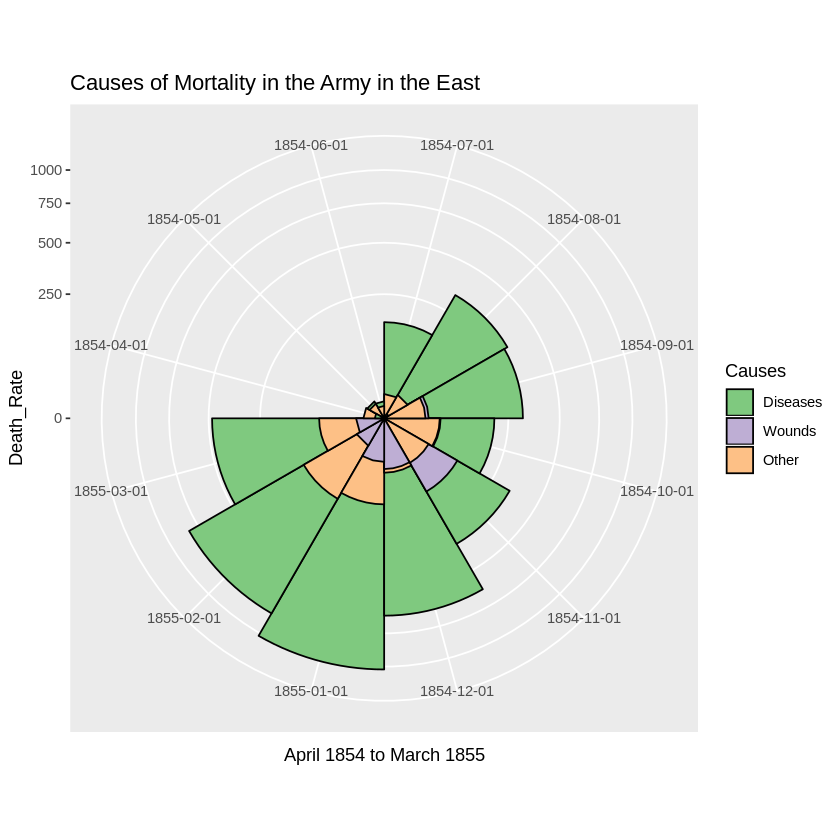

In [83]:
# April 1854 to March 1855 plot
r1 <- ggplot(df1, aes(x = factor(Date), y=Death_Rate, fill = Causes)) +
		# doing it as a stacked bar chart first
   geom_bar(width = 1, position="identity", stat="identity", color="black") +
		# setting scale so that the area of sectors in polar charts are proportional to rate of Deaths	
   scale_y_sqrt() 
		# A rose plot = bar chart + polar coordinates
r1 + coord_polar(start=3*pi/2) + 
  #scale_fill_manual(values = c("#00CED1", "red", "black" )) +
  scale_fill_brewer(palette = "Accent") +
	ggtitle("Causes of Mortality in the Army in the East") + 
	xlab("April 1854 to March 1855")


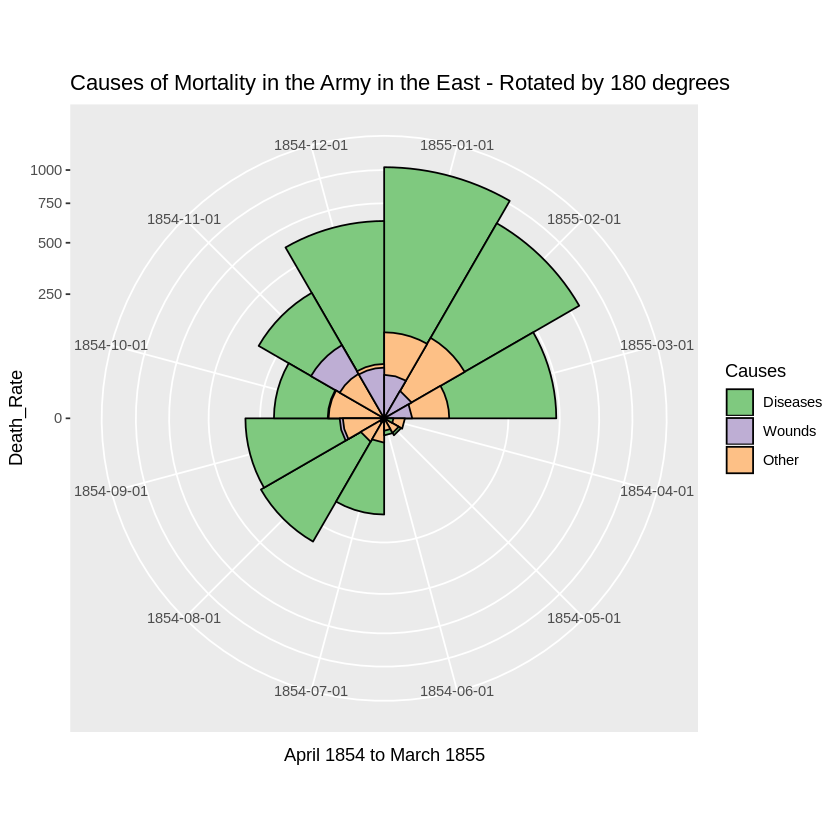

In [99]:
# Rotate the first graph by 180 degrees
# 3*pi/2 = 270 degrees. So rotating by 180 degrees would give either 90 degrees or pi/2 , or , 450 degrees
r1 + coord_polar(start=pi/2) + 
  scale_fill_brewer(palette = "Accent") +
	ggtitle("Causes of Mortality in the Army in the East - Rotated by 180 degrees") + 
	xlab("April 1854 to March 1855")

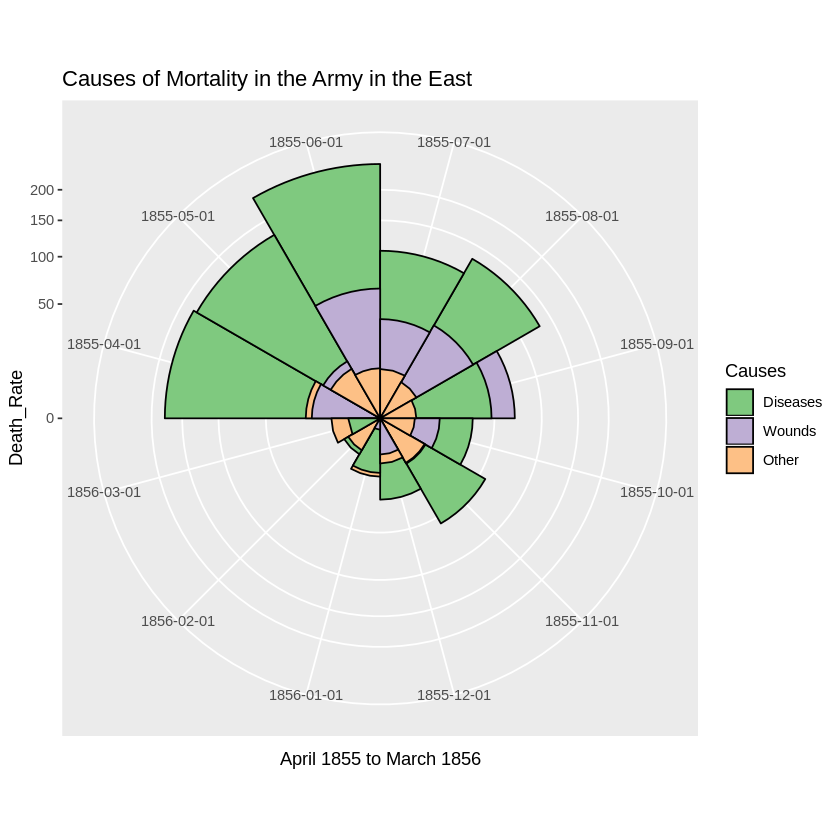

In [84]:
# April 1855 to March 1856 plot
r2 <- ggplot(df2, aes(x = factor(Date), y=Death_Rate, fill = Causes)) +
   geom_bar(width = 1, position="identity", stat="identity", color="black") +
   scale_y_sqrt()
r2 + coord_polar(start=3*pi/2) +
  scale_fill_brewer(palette = "Accent") +
	ggtitle("Causes of Mortality in the Army in the East") + 
	xlab("April 1855 to March 1856")

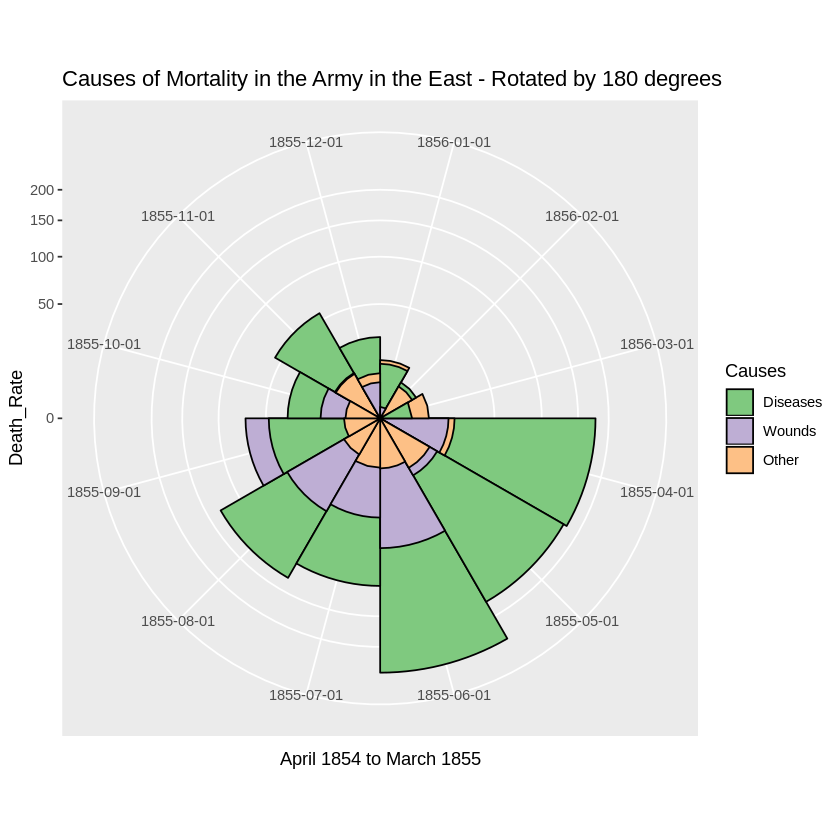

In [101]:
# Rotate the first graph by 180 degrees
# 3*pi/2 = 270 degrees. So rotating by 180 degrees would give either 90 degrees or pi/2 , or , 450 degrees
r2 + coord_polar(start=pi/2) + 
  scale_fill_brewer(palette = "Accent") +
	ggtitle("Causes of Mortality in the Army in the East - Rotated by 180 degrees") + 
	xlab("April 1854 to March 1855")

In [0]:
# Both plots together
# r <- ggplot(df, aes(x = factor(Date), y=Death_Rate, fill = Causes)) +
#  geom_bar(width = 1, position="identity", stat="identity", color="black") + 
#  scale_y_sqrt() +
#  facet_grid(. ~ Reign, labeller=label_both)
# r + coord_polar(start=3*pi/2) +
#   scale_fill_brewer(palette = "Accent") +
# 	ggtitle("Causes of Mortality in the Army in the East") + 
# 	xlab("") 
  #ggsave("rose_charts",plot = last_plot(),device = "png",path = getwd(),dpi = 320, height = 10, width = 10 )
